In [1]:
import os
import numpy as np
import tensorflow
import tensorboard
import torch
from IPython.display import Image

In [2]:
ROOT_DIR = '/content/yolov8/'

os.makedirs(ROOT_DIR, exist_ok=True)

In [3]:
%cd yolov8

/content/yolov8


In [4]:
!git clone https://github.com/ultralytics/ultralytics

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [5]:
!pip install ultralytics

In [6]:
#!pip install -r /content/yolov8/requirements.txt

In [7]:
!pip install roboflow

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="J04IPGkm0ss1GXBYakq1")
project = rf.workspace("marziye-fmvxw").project("strawberry-classification-2")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.26, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to strawberry-classification-2-2 in yolov8:: 100%|██████████| 2810/2810 [00:00<00:00, 3371.35it/s]


In [9]:
{dataset.location}

{'/content/yolov8/strawberry-classification-2-2'}

In [12]:
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=150 imgsz=640

100% 83.7M/83.7M [00:00<00:00, 290MB/s]
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/yolov8/strawberry-classification-2-2/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

In [13]:
!yolo task=detect mode=val model=/content/yolov8/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/yolov8/strawberry-classification-2-2/valid/labels.cache... 149 images, 0 backgrounds, 0 corrupt: 100% 149/149 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:11<00:00,  1.10s/it]
                   all        149        187      0.938        0.9      0.957      0.808
                  ripe         21         26      0.923      0.918      0.942      0.795
                unripe        131        161      0.954      0.882      0.973      0.821
Speed: 4.8ms preprocess, 34.8ms inference, 0.0ms loss, 17.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
!yolo task=detect mode=predict model=/content/yolov8/runs/detect/train3/weights/best.pt conf=0.5 source="/content/strawberries-.jpg" save=True

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/strawberries-.jpg: 448x640 6 ripes, 5 unripes, 69.4ms
Speed: 3.2ms preprocess, 69.4ms inference, 1289.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


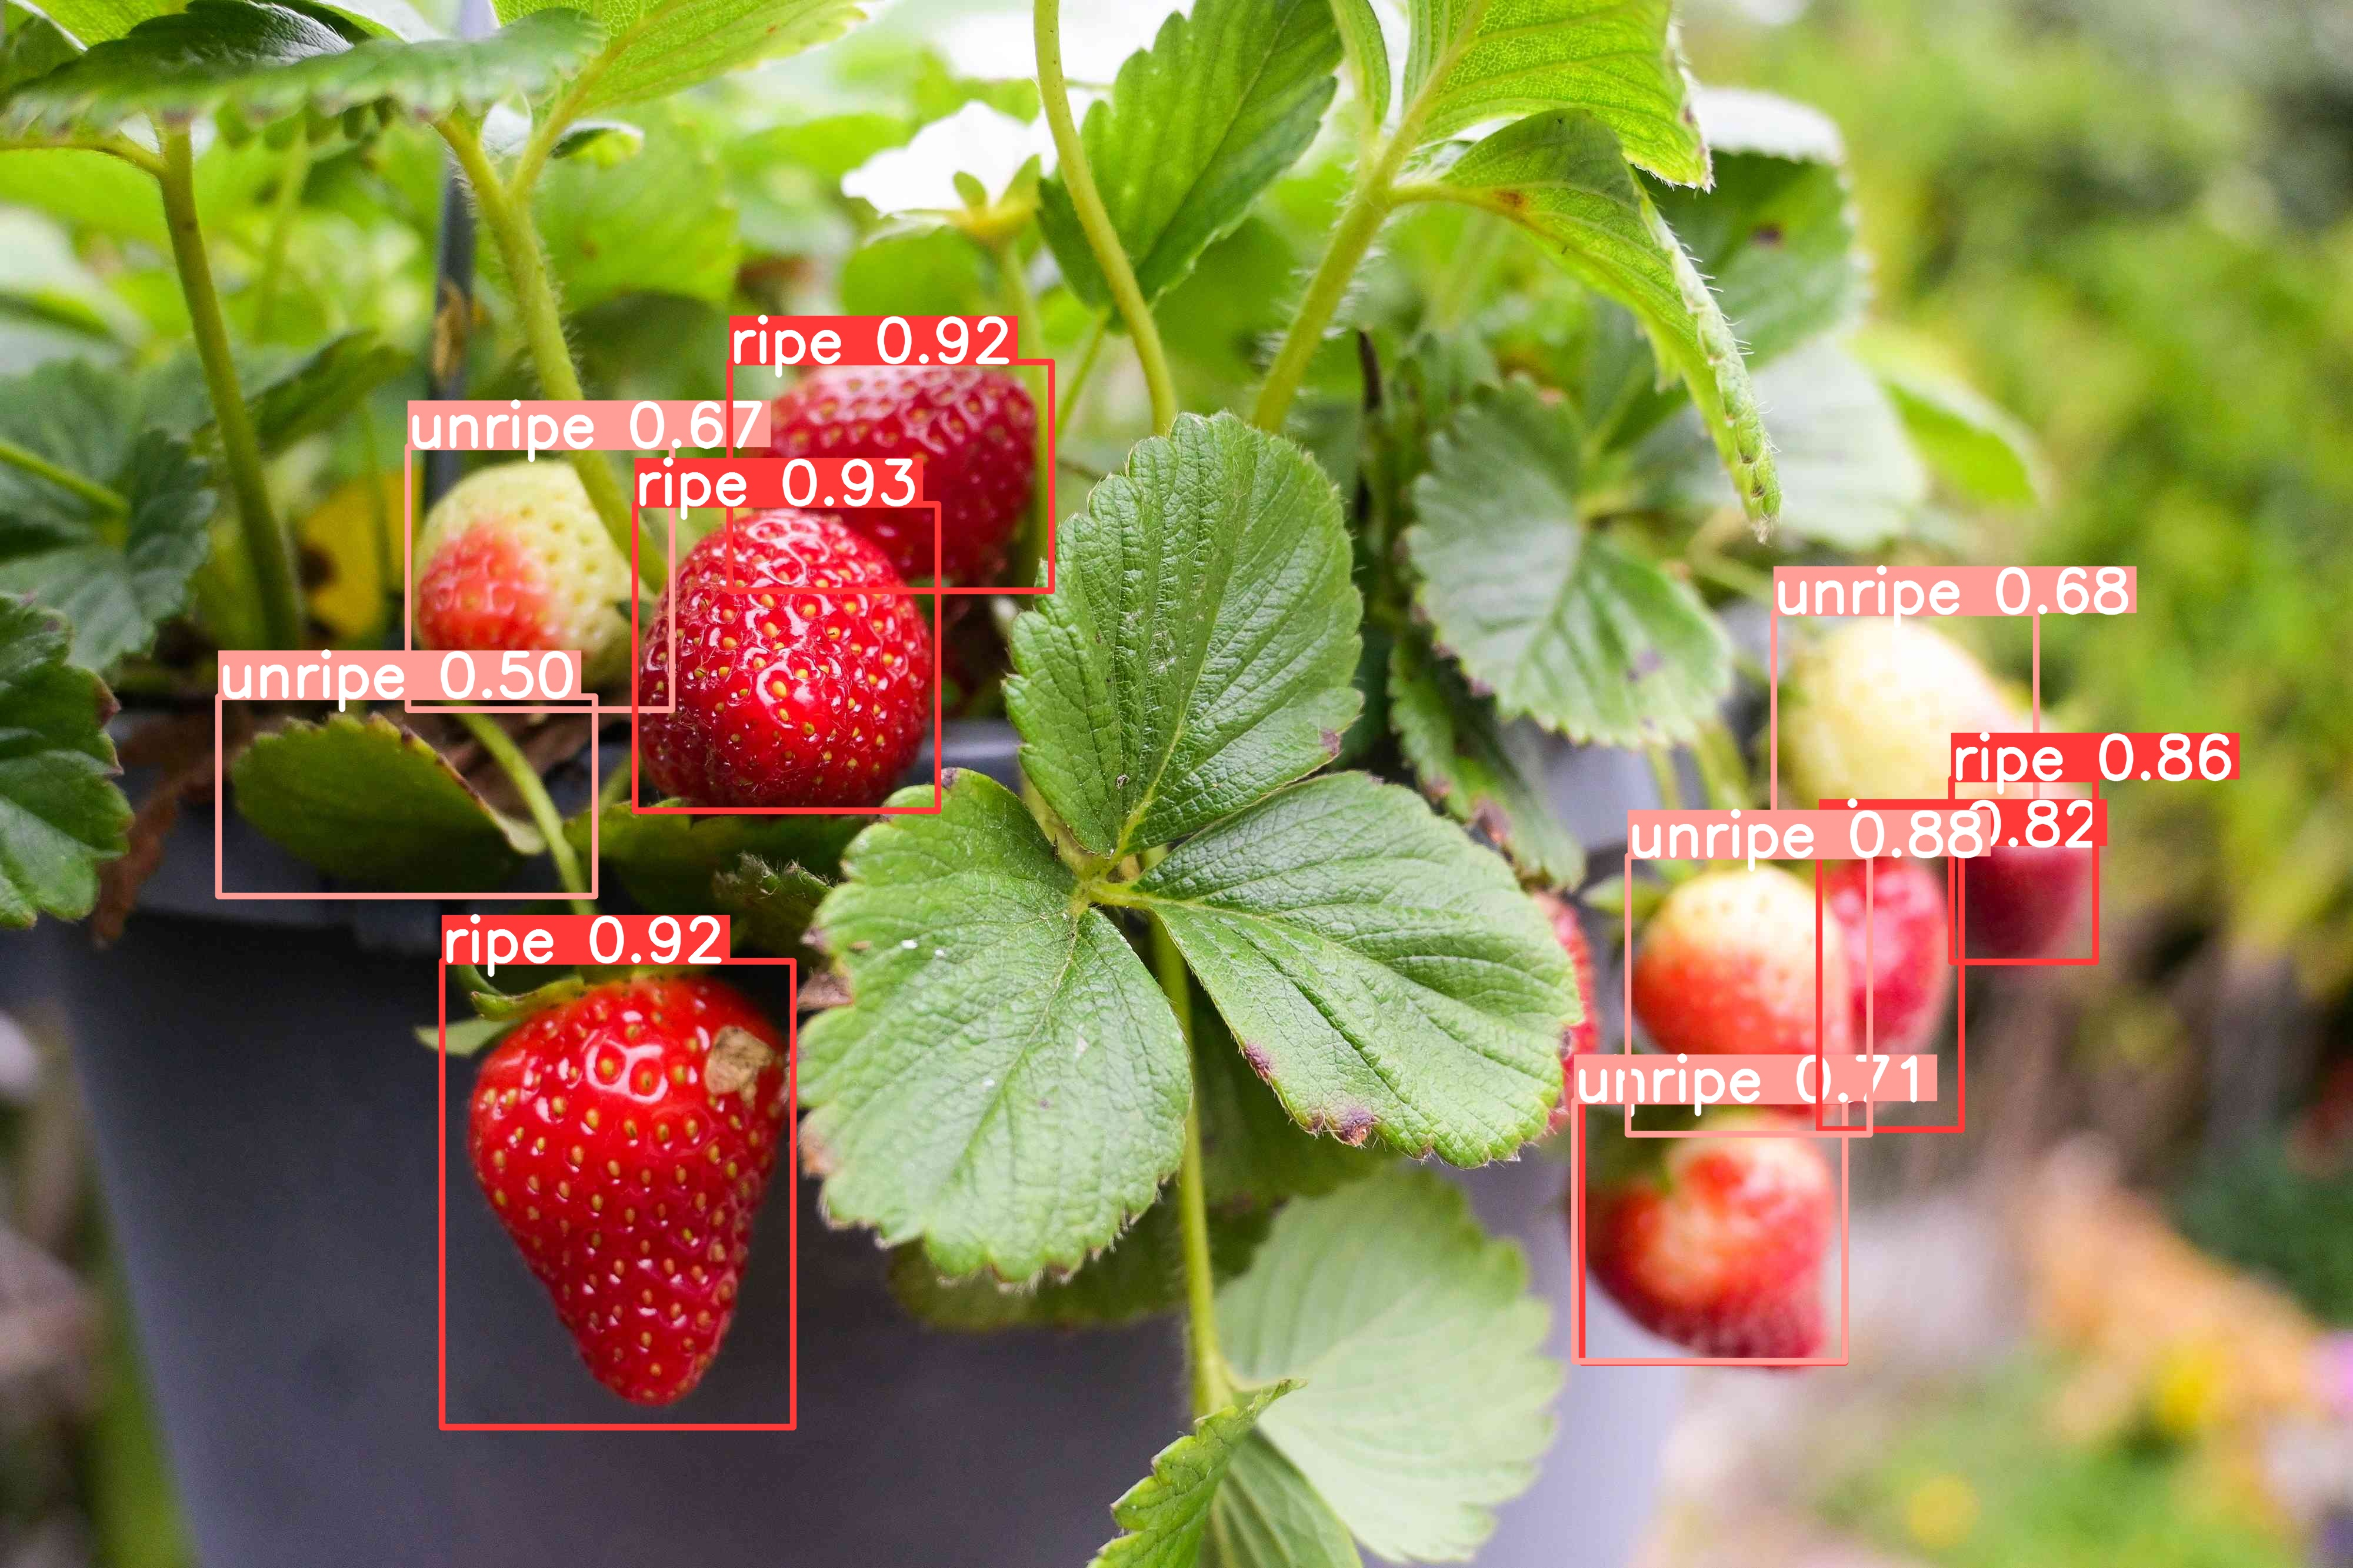

In [16]:
Image(os.path.join(ROOT_DIR,"/content/yolov8/runs/detect/predict/strawberries-.jpg"), width = 600)

In [17]:
!yolo task=detect mode=predict model=/content/yolov8/runs/detect/train3/weights/best.pt conf=0.5 source="/content/WhatsApp Image.jpeg" save=True

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/WhatsApp Image.jpeg: 384x640 10 ripes, 9 unripes, 101.9ms
Speed: 3.4ms preprocess, 101.9ms inference, 1604.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


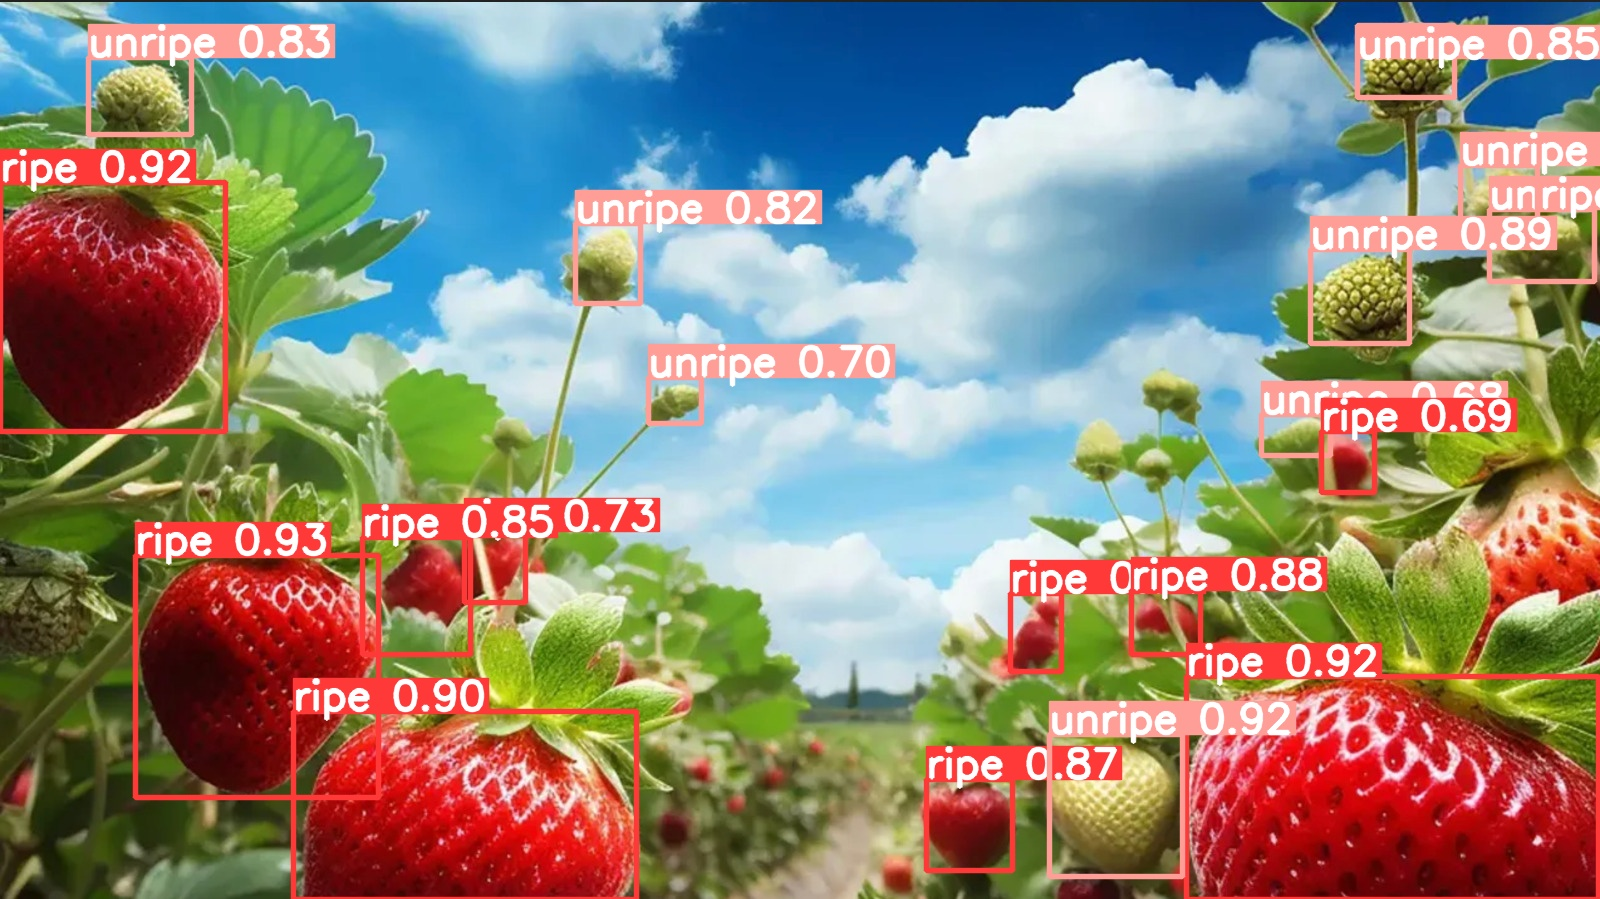

In [18]:
Image(os.path.join(ROOT_DIR,"/content/yolov8/runs/detect/predict2/WhatsApp Image.jpeg"), width = 600)

In [21]:
!yolo task=detect mode=predict model=/content/yolov8/runs/detect/train3/weights/best.pt conf=0.5 source="/content/test3.jpeg" save=True

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/test3.jpeg: 640x480 1 ripe, 13 unripes, 166.2ms
Speed: 4.1ms preprocess, 166.2ms inference, 1979.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


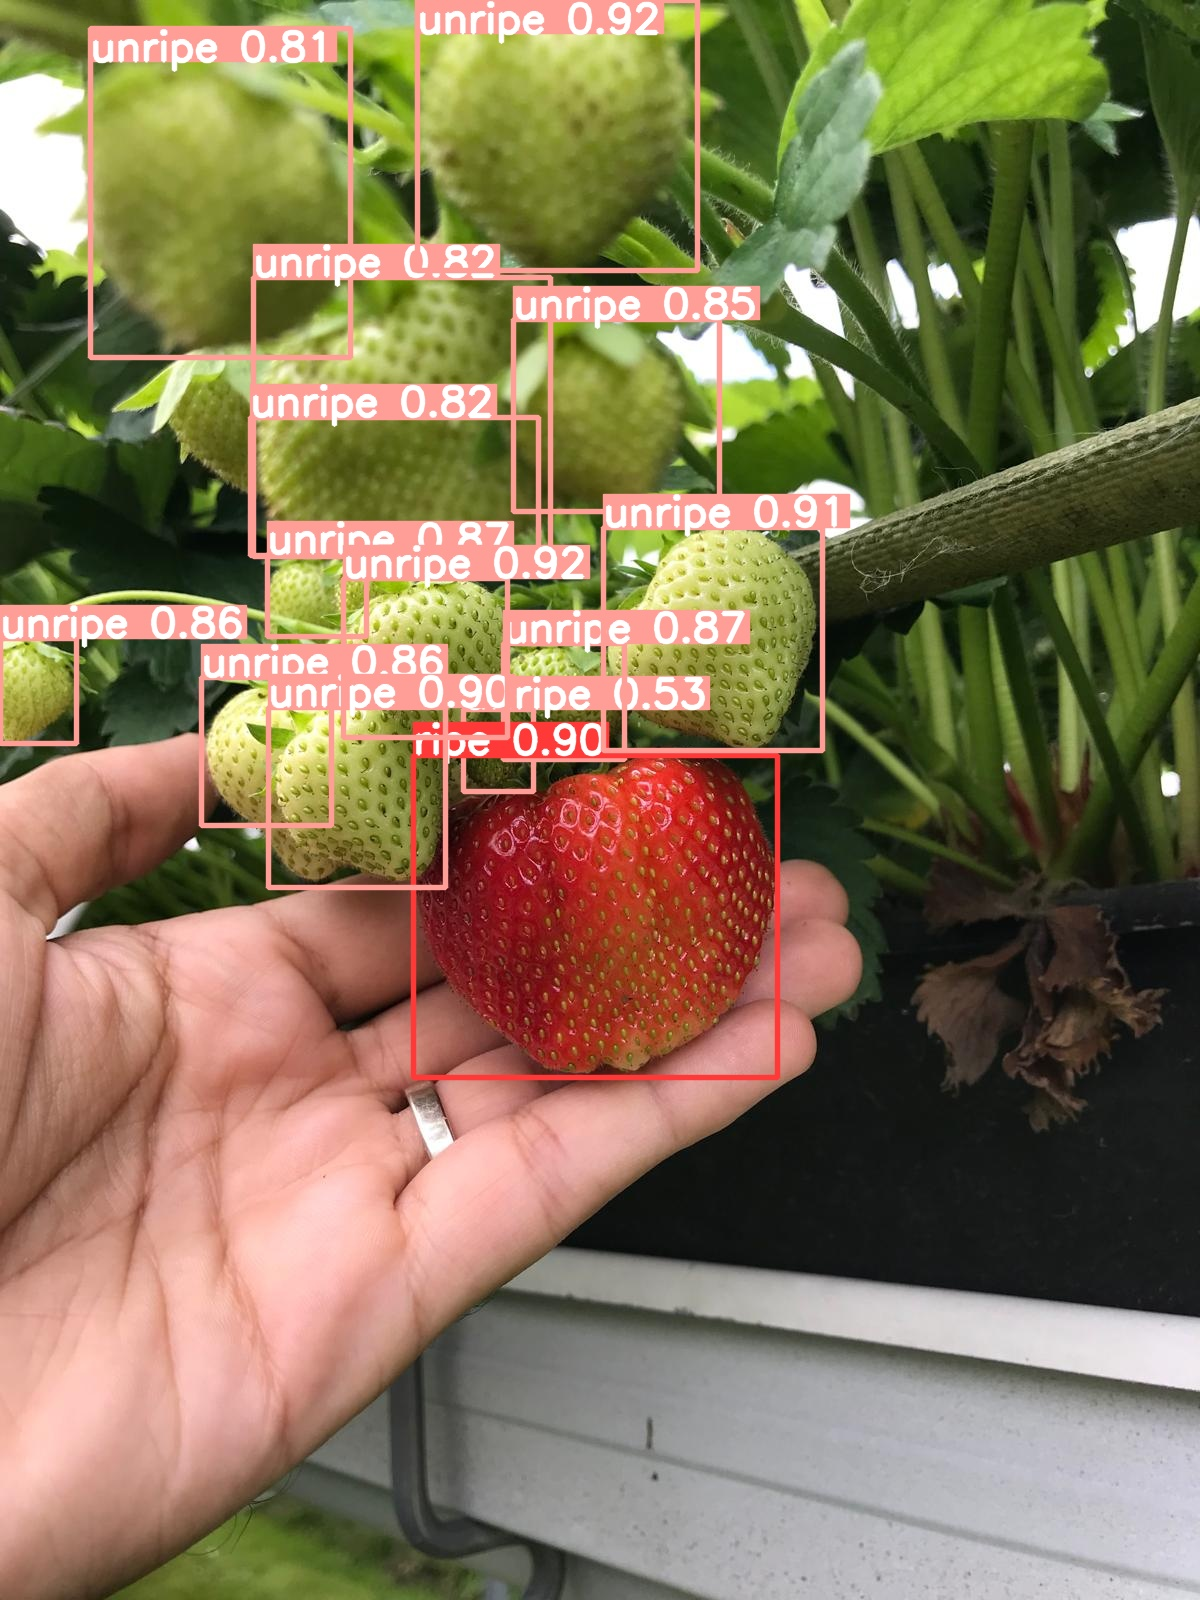

In [22]:
Image(os.path.join(ROOT_DIR,"/content/yolov8/runs/detect/predict4/test3.jpeg"), width = 600)

In [34]:
!yolo task=detect mode=predict model=/content/yolov8/runs/detect/train3/weights/best.pt conf=0.5 source="/content/test5.jpeg" save=True

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/test5.jpeg: 640x480 5 ripes, 33 unripes, 85.3ms
Speed: 4.0ms preprocess, 85.3ms inference, 1379.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


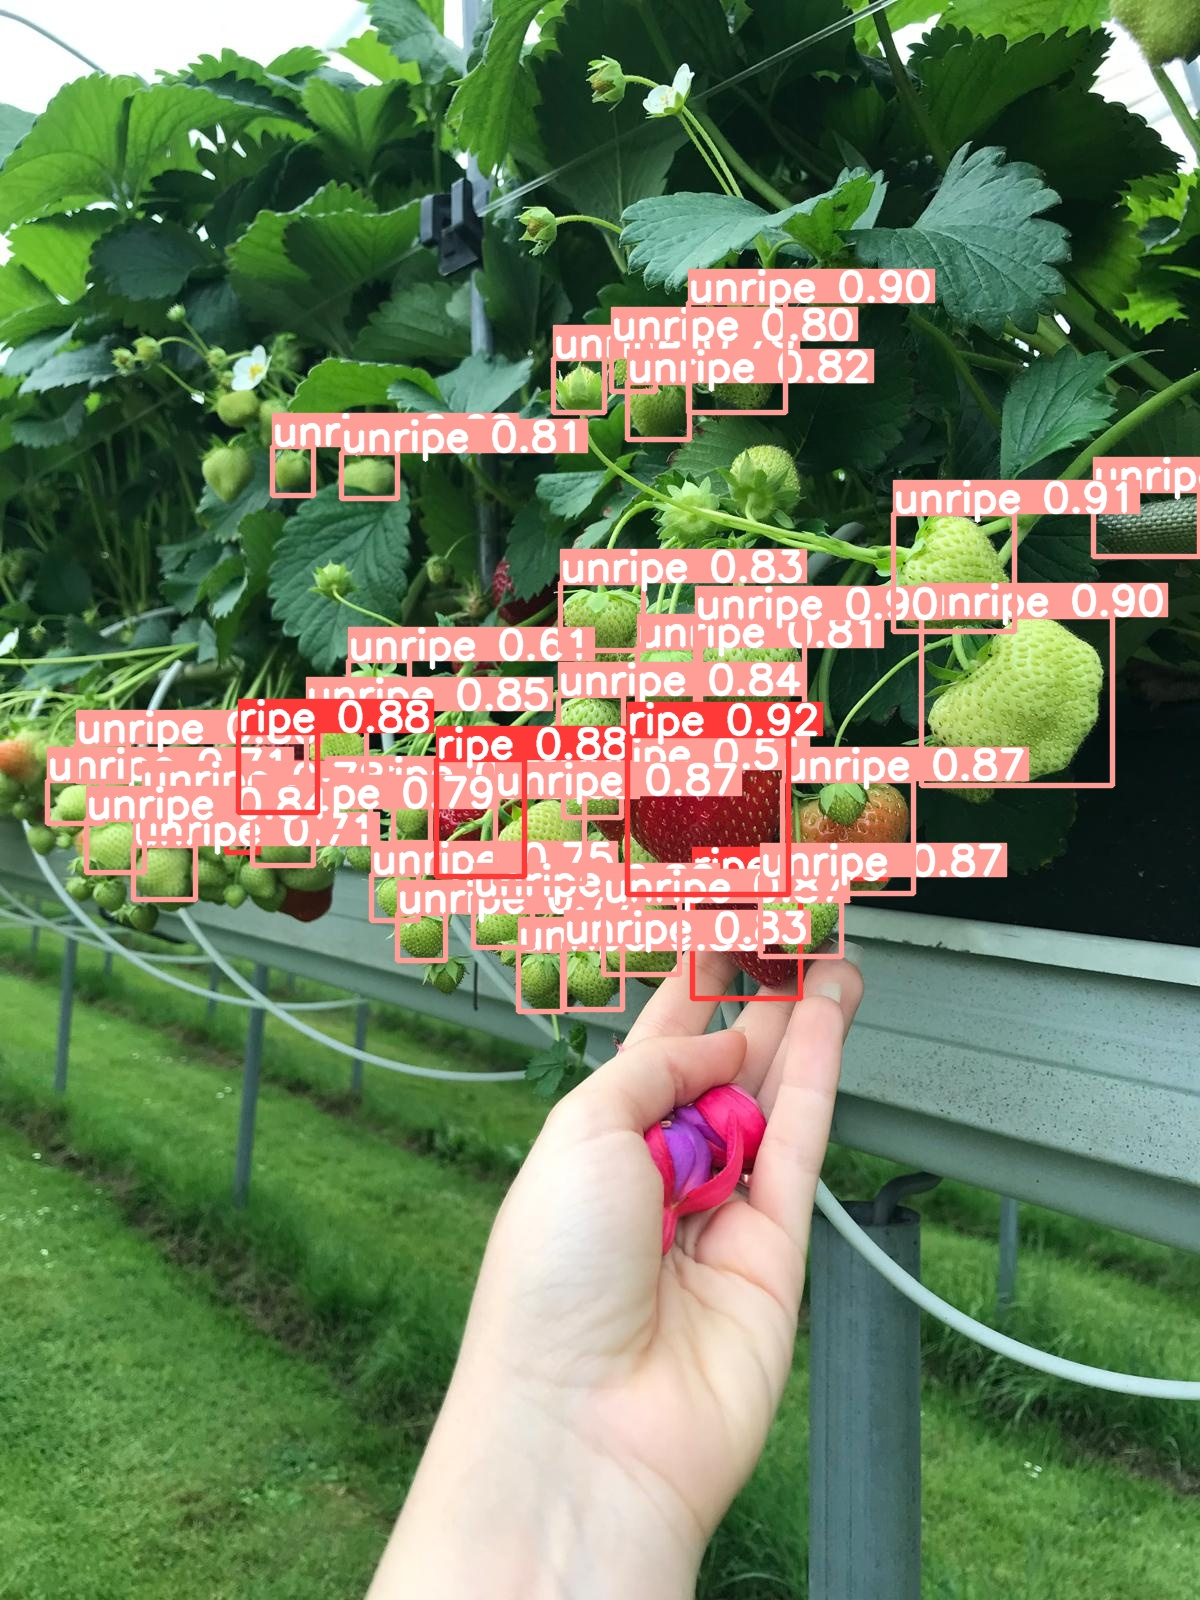

In [35]:
Image(os.path.join(ROOT_DIR,"/content/yolov8/runs/detect/predict6/test5.jpeg"), width = 600)